# Predicting heart disease using machine learning

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

We're going to take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition

In a statement,
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data

The original data came from the Cleavland data from the UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/heart+Disease

There is also a version of it available on Kaggle. https://www.kaggle.com/ronitf/heart-disease-uci

## 3. Evaluation

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

## 4. Features

This is where you'll get different information about each of the features in your data. You can do this via doing your own research (such as looking at the links above) or by talking to a subject matter expert (someone who knows about the dataset).

**Create data dictionary**

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        * can range from mild symptoms to severe problems
        * signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        * Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 

from sklearn.linear_model  import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score, f1_score, recall_score
from sklearn.metrics import plot_roc_curve , auc

In [3]:
df = pd.read_csv("heart-disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [8]:
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


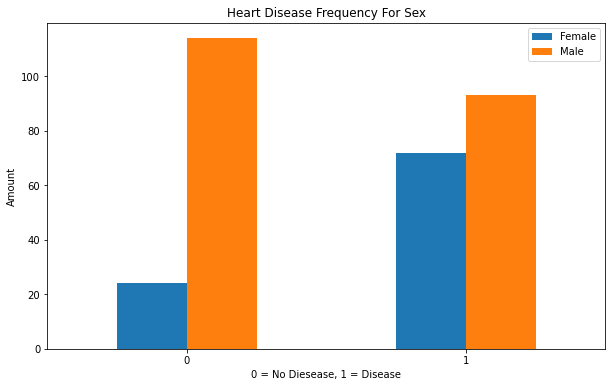

In [9]:
pd.crosstab(df.target, df.sex).plot(kind="bar" , figsize = (10,6) )
plt.title("Heart Disease Frequency For Sex");
plt.xlabel("0 = No Diesease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"]);
plt.xticks(rotation=0);

## 5.Modelling 

In [10]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
x = df.drop("target", axis=1)
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [5]:
y = df['target']
y.head(), len(y)

(0    1
 1    1
 2    1
 3    1
 4    1
 Name: target, dtype: int64,
 303)

In [6]:
np.random.seed(42)

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [7]:
len(x_train), len(x_test), y_train.shape, len(y_test)


(242, 61, (242,), 61)

In [15]:
y_train


132    1
202    0
196    0
75     1
176    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 242, dtype: int64

In [16]:
models ={
    "LogisticRegression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "RandomForestClassifier": RandomForestClassifier()
}


def model_evaluation(models, x_train, x_test, y_train, y_test):
    """
    Fit and Evaluate givsn machine learning models using scikit-learn
    x_train= training data(no labels)
    x_test = test data (no labels)
    y_train = training label
    y_test = tset label
    
    """
    model_scores = {}
    np.random.seed(42)
    
    for name , model in models.items():
        model.fit(x_train, y_train)
        model_scores[name]= model.score(x_test, y_test)
        
    return model_scores


model_scores= model_evaluation(models=models, x_train=x_train,
                 x_test=x_test, y_train=y_train,
                 y_test=y_test)

model_scores

C:\Users\rpsbu\Py-DS-ML-Bootcamp-master\heart-disease project\env\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'LogisticRegression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'RandomForestClassifier': 0.8360655737704918}

### Comparing models using bar graphs

In [17]:
model_scores = pd.DataFrame(model_scores, index =["accuracy"])
model_scores

,LogisticRegression,KNN,RandomForestClassifier
accuracy,0.885246,0.688525,0.836066


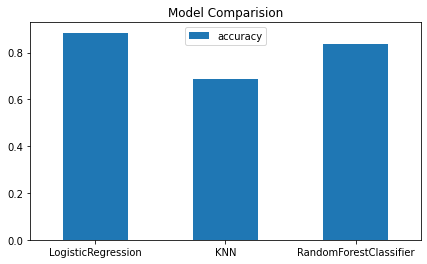

In [18]:
model_scores.T.plot(kind="bar", title="Model Comparision", figsize=(7,4))
plt.xticks(rotation=0);

## Hyperparameter Tuning 

In [19]:
train_scores =[]
test_scores= []

knn = KNeighborsClassifier()
for i in range(1,21):
    knn.set_params(n_neighbors= i)
    knn.fit(x_train, y_train)
    train_scores.append(knn.score(x_train, y_train))
    test_scores.append(knn.score(x_test, y_test))   
    

In [20]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [21]:
test_scores


[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

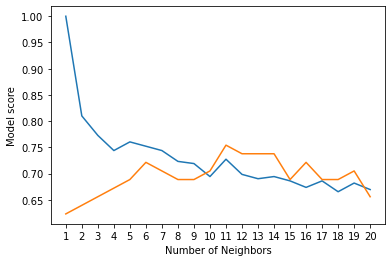

In [22]:
plt.plot(range(1,21), train_scores, label='Train score')
plt.plot(range(1,21), test_scores, label="Test scores")
plt.xticks(np.arange(1,21,1))
plt.ylabel("Model score")
plt.xlabel("Number of Neighbors");


## Hyperparmater Tuning using RandomizedSearchCV 

In [23]:
np.random.seed(42)

rg_rf_grid =  { "bootstrap":[True, False], 
                "n_estimators": np.arange(100, 1400, 100),
                 "max_features": ['auto', 'sqrt'],
                  "max_depth": np.arange(10,100,10),
                  "min_samples_split": [2,5,10],
                  "min_samples_leaf": [1,2,4]}

log_reg_grid = {"C": np.logspace(-4,4,20),
                 "solver": [ 'liblinear']}

rg_rf_grid2= {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [24]:
model_rfc = RandomForestClassifier()

rfc_rsc = RandomizedSearchCV(estimator = model_rfc,
                             param_distributions = rg_rf_grid,
                             cv =5,
                            n_iter = 20,
                            verbose= True)
rfc_rsc.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': array([10, 20, 30, 40, 50, 60, 70, 80, 90]),
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000, 1100,
       1200, 1300])},
                   verbose=True)

In [25]:
rfc_rsc.best_params_


{'n_estimators': 1200,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': True}

In [26]:
rfc_rsc.score(x_test,y_test)

0.8524590163934426

In [27]:
np.random.seed(42)
log_reg_rsc = RandomizedSearchCV(LogisticRegression(),log_reg_grid)
log_reg_rsc.fit(x_train, y_train)

RandomizedSearchCV(estimator=LogisticRegression(),
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']})

In [28]:
log_reg_rsc.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [29]:
log_reg_rsc.score(x_test,y_test)

0.8852459016393442

## HyperTuning Using GridSearchCV

In [30]:
log_reg_gsc= GridSearchCV(LogisticRegression(), param_grid=log_reg_grid, cv =5, verbose = True)
log_reg_gsc.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [31]:
log_reg_gsc.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [32]:
log_reg_gsc.score(x_test, y_test)

0.8852459016393442

## Evaluating our tuned machine learning model

In [33]:
y_preds = log_reg_gsc.predict(x_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

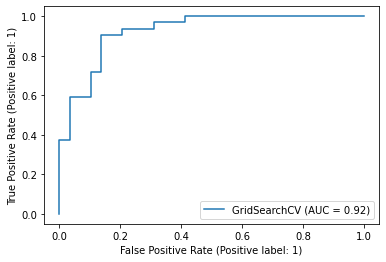

In [34]:
plot_roc_curve(log_reg_gsc,x_test, y_test);

In [35]:
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


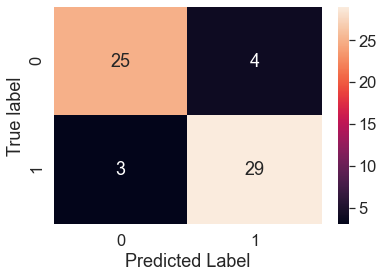

In [36]:
import seaborn as sns
sns.set(font_scale=1.5)

def plot_conf_matrix(y_test, y_preds):
    fig, ax = plt.subplots(figsize=(6,4))
    ax=sns.heatmap(confusion_matrix(y_test, y_preds),annot=True)
    plt.xlabel("Predicted Label")
    plt.ylabel("True label")
    
    
plot_conf_matrix(y_test, y_preds)

In [37]:
print(classification_report(y_test, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        32

    accuracy                           1.00        61
   macro avg       1.00      1.00      1.00        61
weighted avg       1.00      1.00      1.00        61



## Evaluting Using Cross validation

In [38]:
log_reg_gsc.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [39]:
clf = LogisticRegression(C=0.23357214690901212, solver='liblinear')

from sklearn.model_selection import cross_val_score
cv_acc= cross_val_score(clf, x,y, cv=5, scoring="accuracy")
cv_acc= np.mean(cv_acc)
cv_acc

0.8479781420765027

In [40]:
cv_prec= cross_val_score(clf, x,y, cv=5, scoring="precision")
cv_prec= np.mean(cv_prec)
cv_prec

0.8215873015873015

In [41]:
cv_recall= cross_val_score(clf, x,y, cv=5, scoring="recall")
cv_recall= np.mean(cv_recall)
cv_recall

0.9272727272727274

In [42]:
cv_f1= cross_val_score(clf, x,y, cv=5, scoring="f1")
cv_f1= np.mean(cv_f1)
cv_f1

0.8705403543192143

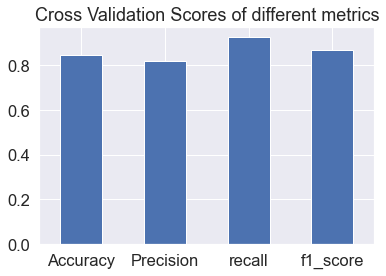

In [43]:
cv_metrics= pd.DataFrame({"Accuracy":cv_acc,
                          "Precision": cv_prec,
                          "recall":cv_recall,
                           "f1_score": cv_f1},
                        index=[0])
cv_metrics.T.plot(kind="bar", legend=False, title="Cross Validation Scores of different metrics")
plt.xticks(rotation=0);


## Feature Importance

In [44]:
np.random.seed(42)
clf.fit(x_test, y_test)

LogisticRegression(C=0.23357214690901212, solver='liblinear')

In [45]:
clf.coef_

array([[ 0.0505051 , -0.31997775,  0.76281182, -0.05383338, -0.00845635,
        -0.18769143,  0.30538971,  0.05331293, -0.07326352, -0.21210947,
        -0.18348686, -0.49539475, -0.28317136]])

In [46]:
feat_dict = dict(zip(df.columns,list(clf.coef_[0])))
feat_dict

{'age': 0.05050509905685088,
 'sex': -0.31997775494382485,
 'cp': 0.7628118218698546,
 'trestbps': -0.053833380272490794,
 'chol': -0.0084563501627094,
 'fbs': -0.18769143252454348,
 'restecg': 0.305389708578618,
 'thalach': 0.053312932675609076,
 'exang': -0.0732635175828121,
 'oldpeak': -0.21210947135660702,
 'slope': -0.18348685994617864,
 'ca': -0.4953947480127579,
 'thal': -0.2831713608122478}

In [47]:
feat_df= pd.DataFrame(feat_dict, index=[0])
feat_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.050505,-0.319978,0.762812,-0.053833,-0.008456,-0.187691,0.30539,0.053313,-0.073264,-0.212109,-0.183487,-0.495395,-0.283171


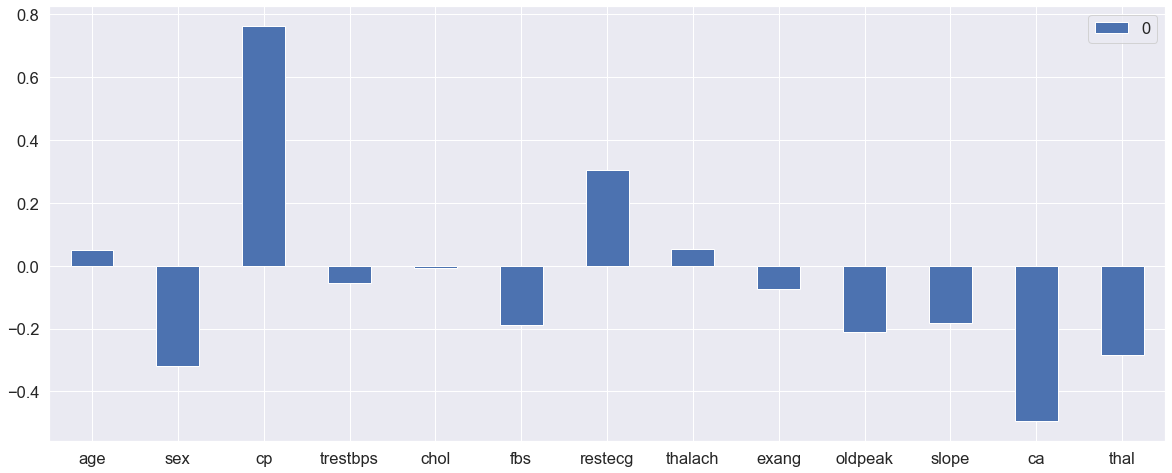

In [48]:
feat_df.T.plot(kind="bar", figsize=(20,8))
plt.xticks(rotation=0);

In [49]:
pd.crosstab(df["cp"], df["target"])

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


In [50]:
pd.crosstab(df["ca"], df["target"])

target,0,1
ca,,
0,45,130
1,44,21
2,31,7
3,17,3
4,1,4


## Saving the model


In [9]:
from joblib import dump,load

In [53]:
dump(clf, "heart_disease-model.joblib")

['heart_disease-model.joblib']

In [10]:
model123 = load("heart_disease-model.joblib")

In [11]:
model123.score(x_test, y_test)

0.9016393442622951

In [13]:
import pickle
filename="heart_dis_model.pkl"

In [14]:
pickle.dump(model123, open(filename, 'wb'))

In [16]:
md= pickle.load(open(filename, 'rb'))

In [ ]:
md